In [1]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import joblib

In [2]:
args = {
    "dataset_t": "confidential/train150.txt",
    "dataset_p": "confidential/prev150.txt",
    "model": "out/wind_speed_nn.model",
    "norm": "out/wind_speed_norm",
    "plot": "out/wind_speed_predict_1h_plot.png"
}

In [3]:
# load train datas
dataframe_t = pd.read_csv(args["dataset_t"], delimiter="\t", header=None)
dataset_t = dataframe_t.values

# dataset for execution of the prediction for next 6 hours
dataset_t = dataset_t[::6]

In [4]:
# load pred datas
dataframe_p = pd.read_csv(args["dataset_p"], delimiter="\t", header=None)
dataset_p = dataframe_p.values

# dataset for execution of the prediction for next 6 hours
dataset_p = dataset_p[2::6]

In [5]:
# preprocessing for input in rna
X_prev = np.copy(dataset_p)
X_prev[:, 4] = np.concatenate([dataset_t[-1:, 4], dataset_p[:-1, 4]])

In [6]:
# importing scaler normalization
scaler_x = joblib.load("{}_x.joblib".format(args["norm"]))
scaler_y = joblib.load("{}_y.joblib".format(args["norm"]))

In [7]:
# datas normalization
X_prev = scaler_x.transform(X_prev)
print(X_prev)

[[ 0.75862069  1.          0.          0.60869565  0.22252731  0.26754576
   0.20092143  0.59968011  0.89021072]
 [ 0.75862069  1.          0.          0.86956522  0.60950813  0.22621533
   0.28819689  0.7392621   0.87883757]
 [ 0.79310345  1.          0.          0.08695652  0.68031433  0.12501555
   0.31091242  0.84625679  0.87768048]
 [ 0.79310345  1.          0.          0.34782609  0.38777177  0.25626444
   0.15015636  0.78850328  0.90164395]
 [ 0.79310345  1.          0.          0.60869565  0.28365561  0.23401217
   0.41101476  0.66259187  0.86715237]
 [ 0.79310345  1.          0.          0.86956522  0.94283289  0.17024877
   0.37682385  0.7626448   0.87067209]
 [ 0.82758621  1.          0.          0.08695652  0.58186986  0.11466278
   0.30983257  0.8872276   0.84338466]
 [ 0.82758621  1.          0.          0.34782609  0.55630221  0.08719898
   0.54211422  0.56015081  0.83767483]
 [ 0.82758621  1.          0.          0.60869565  0.48193995  0.2385737
   0.44518811  0.649105

In [8]:
# load trained model and predict
model = tf.keras.models.load_model(args["model"])
preds = model.predict(X_prev)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [9]:
# inverse normalization
Y_pred = scaler_y.inverse_transform(preds)

In [10]:
# # plot prediction
# y_size = range(len(dataset_p))
# Y_real = dataset_p[:,4]

# plt.figure(figsize=(20,10))
# plt.style.use("ggplot")
# plt.plot(y_size, Y_real, linestyle="--", label="Anemômetro")
# plt.plot(y_size, Y_pred, label="Rede Neural Artificial")
# plt.title("Previsão da velocidade média em Mucuri")
# plt.xlabel("Tempo")
# plt.ylabel("Velocidade do vento (m/s)")
# plt.legend()
# plt.savefig(args["plot"])

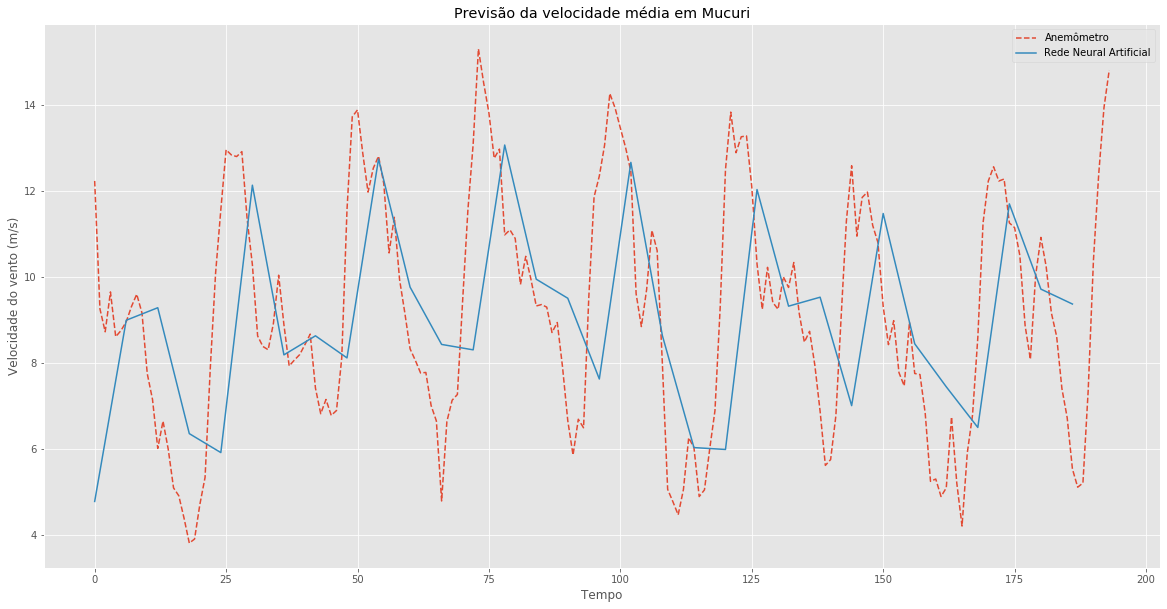

In [11]:
# plot prediction for six days
y_size = range(len(dataframe_p.values))
Y_real = dataframe_p.values[:,4]

plt.figure(figsize=(20,10))
plt.style.use("ggplot")
plt.plot(y_size, Y_real, linestyle="--", label="Anemômetro")
plt.plot(np.arange(len(Y_pred))*6, Y_pred, label="Rede Neural Artificial")
plt.title("Previsão da velocidade média em Mucuri")
plt.xlabel("Tempo")
plt.ylabel("Velocidade do vento (m/s)")
plt.legend()
plt.savefig(args["plot"])